In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/refs/heads/master/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Batch Gradient Descent

In [19]:
class GradientDescentRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 0
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs

    def loss(self,y_true,y_pred):
        n = len(y_true)
        loss = 1/n * np.sum((y_true - y_pred)**2)
        return np.sqrt(loss)

    def fit(self,X,y):
        n = len(X)
        loss_arr = []

        for i in range(self.epochs):
            prediction = np.dot(X,self.m) + self.b
            loss = self.loss(y_true=y,y_pred=prediction)
            loss_arr.append(loss)
            # print(f"The loss is: {loss}")
            error = y - prediction

            slope_m = -2/n * np.sum(error * X)
            slope_b = -2/n * np.sum(error)

            self.m = self.m - self.lr * slope_m
            self.b = self.b - self.lr * slope_b

        print(self.m,self.b)
        return loss_arr

    def predict(self,X):
        pred = self.m * X + self.b
        return pred

In [20]:
gd = GradientDescentRegressor(learning_rate=0.01,epochs=100)
loss = gd.fit(X=df["YearsExperience"].values,y=df["Salary"].values)

11767.64687290499 10173.939157448633


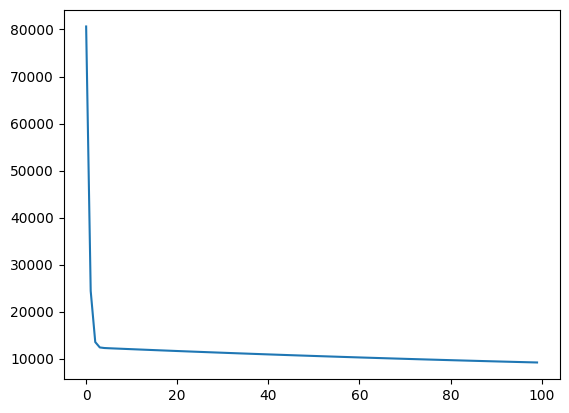

In [ ]:
plt.plot(loss) 

In [75]:
gd_pred = gd.predict(df["YearsExperience"])

In [72]:
r2_score(gd.predict(df["YearsExperience"].values),df["Salary"])

0.9220786260561368

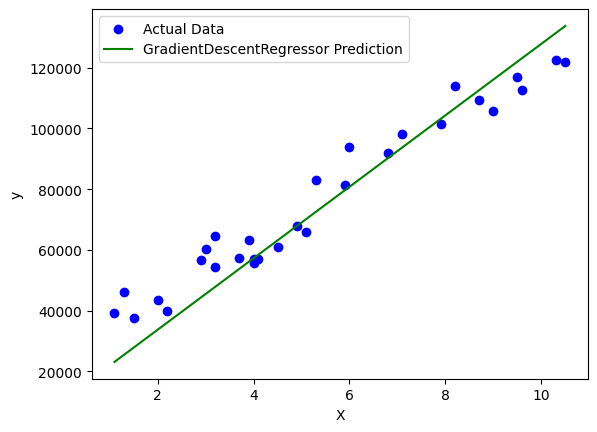

In [79]:
# Plotting
plt.scatter(df["YearsExperience"],df["Salary"], color='blue', label='Actual Data')
plt.plot(df["YearsExperience"], gd_pred, color='green', label='GradientDescentRegressor Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [43]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X=df["YearsExperience"].values.reshape(-1,1),y=df["Salary"].values)

r2_score(sgd.predict(df["YearsExperience"].values.reshape(-1,1)),df["Salary"])

0.9225035421089592

In [49]:
pred = sgd.predict(df["YearsExperience"].values.reshape(-1,1))

In [52]:
np.sqrt(mean_squared_error(df["Salary"],pred))

np.float64(9155.762705229441)

In [53]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=1000,n_features=1)

In [59]:
s

0     -0.290251
1      1.874103
2      0.145738
3      1.699864
4      0.552152
         ...   
995   -0.566015
996   -0.305864
997    0.563924
998   -0.971245
999    0.508083
Length: 1000, dtype: float64

In [ ]:
from sklearn.linear_model import SGDRegressor,LinearRegression

lr = LinearRegression()
sgd = SGDRegressor()
sgd.fit(X,y)
lr.fit(X,y)


LinearRegression()

R2 Score for LinearRegression: 1.0
R2 Score for SGDRegressor: 0.9999999893318481


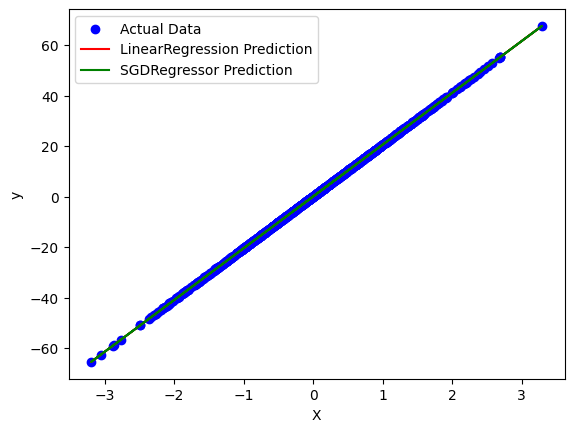

In [68]:

# Make predictions
sgd_pred = sgd.predict(X)
lr_pred = lr.predict(X)

# Calculate R² scores
for i, pred in enumerate([lr_pred, sgd_pred]):
    model_name = "LinearRegression" if i == 0 else "SGDRegressor"
    print(f"R2 Score for {model_name}: {r2_score(y, pred)}")

# Plotting
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, lr_pred, color='red', label='LinearRegression Prediction')
plt.plot(X, sgd_pred, color='green', label='SGDRegressor Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()